# Catch Me If You Can: Aggregated EDA

**Date:** 24 November 2024

**Author:** Marcos Charalambides

**Link to dataset:** https://www.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking

In [1]:
import sys
import os

sys.path.append(os.path.abspath("../"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from datasets.loaders import AliceLoader
from datasets.websites import WebsiteDataset, plot_distributions
from datasets.graphs import GraphDataset
from datasets.sequences import plot_metrics

In [3]:
DATA_DIR = "../data/kaggle/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking/train/other_user_logs/"

In [4]:
user_data = AliceLoader(DATA_DIR).user_data
dataset = WebsiteDataset(user_data)

Loading and preprocessing user data...
Loaded data for 1557 users


In [5]:
sequence_dataset = dataset.to_sequence_dataset()
graph_dataset = GraphDataset.from_sequence_dataset(sequence_dataset)

In [6]:
print(f"Users: {len(user_data)}")
print(f"Sequences (user on date): {len(sequence_dataset.sequences)}")
print(f"Unique (normalised) domains: {sequence_dataset.get_vocab_size()}")

Users: 1557
Sequences (user on date): 13340
Unique (normalised) domains: 16943


## Graph Metrics

In [7]:
graph_metrics = graph_dataset.calculate_metrics()

Calculating graph metrics: 100%|████████| 13340/13340 [00:04<00:00, 2760.60it/s]


In [8]:
graph_dataset.summary_report(graph_metrics)

Graph Dataset Summary Report
------------------------------
Total graphs: 13340

Average graph size: 18.296851574212894
Average graph density: 0.3395898776600083
Average graph complexity: 0.5354857046549175
Average strongly connected components: 1.7694268563440507
Average structural anomaly score: 0.12051030846277976
Average branching factor: 2.40855539472523
Average fraction of graphs per edge: 0.0011470336743042886

Ambient size: 16943
Ambient density: 0.0005411284329265472
Ambient avg clustering: 0.6040621551280871
Ambient avg degree: 18.335595821283125
Ambient strongly connected components: 48
Ambient graph complexity: 0.005269297665809597
Ambient structural anomaly score: 0.0006537118295084597
Ambient avg branching: 9.175921550094518



## Sequence Metrics

In [9]:
metrics = sequence_dataset.calculate_metrics()

Calculating metrics: 100%|██████████████| 13340/13340 [00:01<00:00, 8972.57it/s]


In [10]:
sequence_dataset.summary_report(metrics)

Sequence Dataset Summary Report
--------------------------------
Total sequences: 13340
Average sequence length: 179.16874062968515
Average unique characters per sequence: 18.296851574212894
Average character coverage: 0.0010799062488468921
Average character repetition rate: 0.8572423157807286
Average transition entropy: 2.4186051993450515
Average similarity: 0.3439193054548642
Max similarity: 1.0000000000000002

Unique transitions: 155330
Top 5 starting characters: {'google.com': 1790, 'microsoft.com': 1607, 'google.fr': 1538, 'adobe.com': 1373, 'macromedia.com': 1162}
Average temporal pattern score: 0.40992500613845106



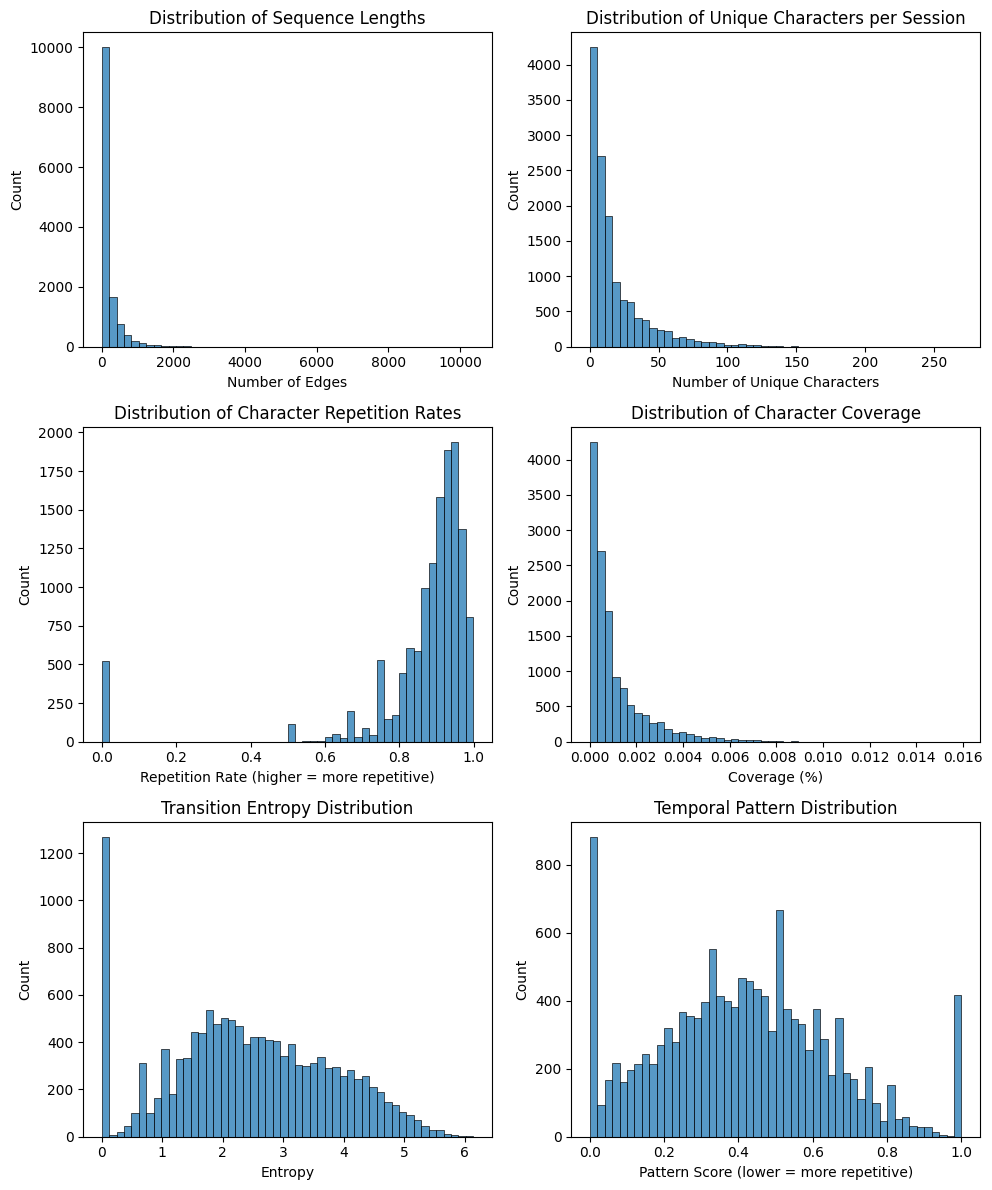

In [11]:
plot_metrics(metrics)
plt.show()

## Browsing Metrics

In [12]:
user_stats, anomalies = dataset.analyse_browsing_patterns_across_users()

User Analysis Summary
-----------------------
total_users: 1557.00
avg_records_per_user: 1535.07
avg_domains_per_user: 78.43
avg_active_days: 8.57
users_with_night_activity: 0.00
users_with_weekend_activity: 153.00
effective_dimension_of_browsing_patterns: 16.78
anomalous_users: 135.00

User Statistics Summary
-----------------------
       total_records  unique_domains  active_days  avg_domains_per_day  \
count    1557.000000     1557.000000  1557.000000          1557.000000   
mean     1535.074502       78.434811     8.567759            17.479725   
std      2617.094340       85.506688     8.593958            13.527764   
min        21.000000        1.000000     1.000000             1.000000   
25%       218.000000       23.000000     3.000000             8.714286   
50%       710.000000       51.000000     6.000000            14.000000   
75%      1854.000000      103.000000    10.000000            22.357143   
max     41390.000000      702.000000   100.000000           165.200000  

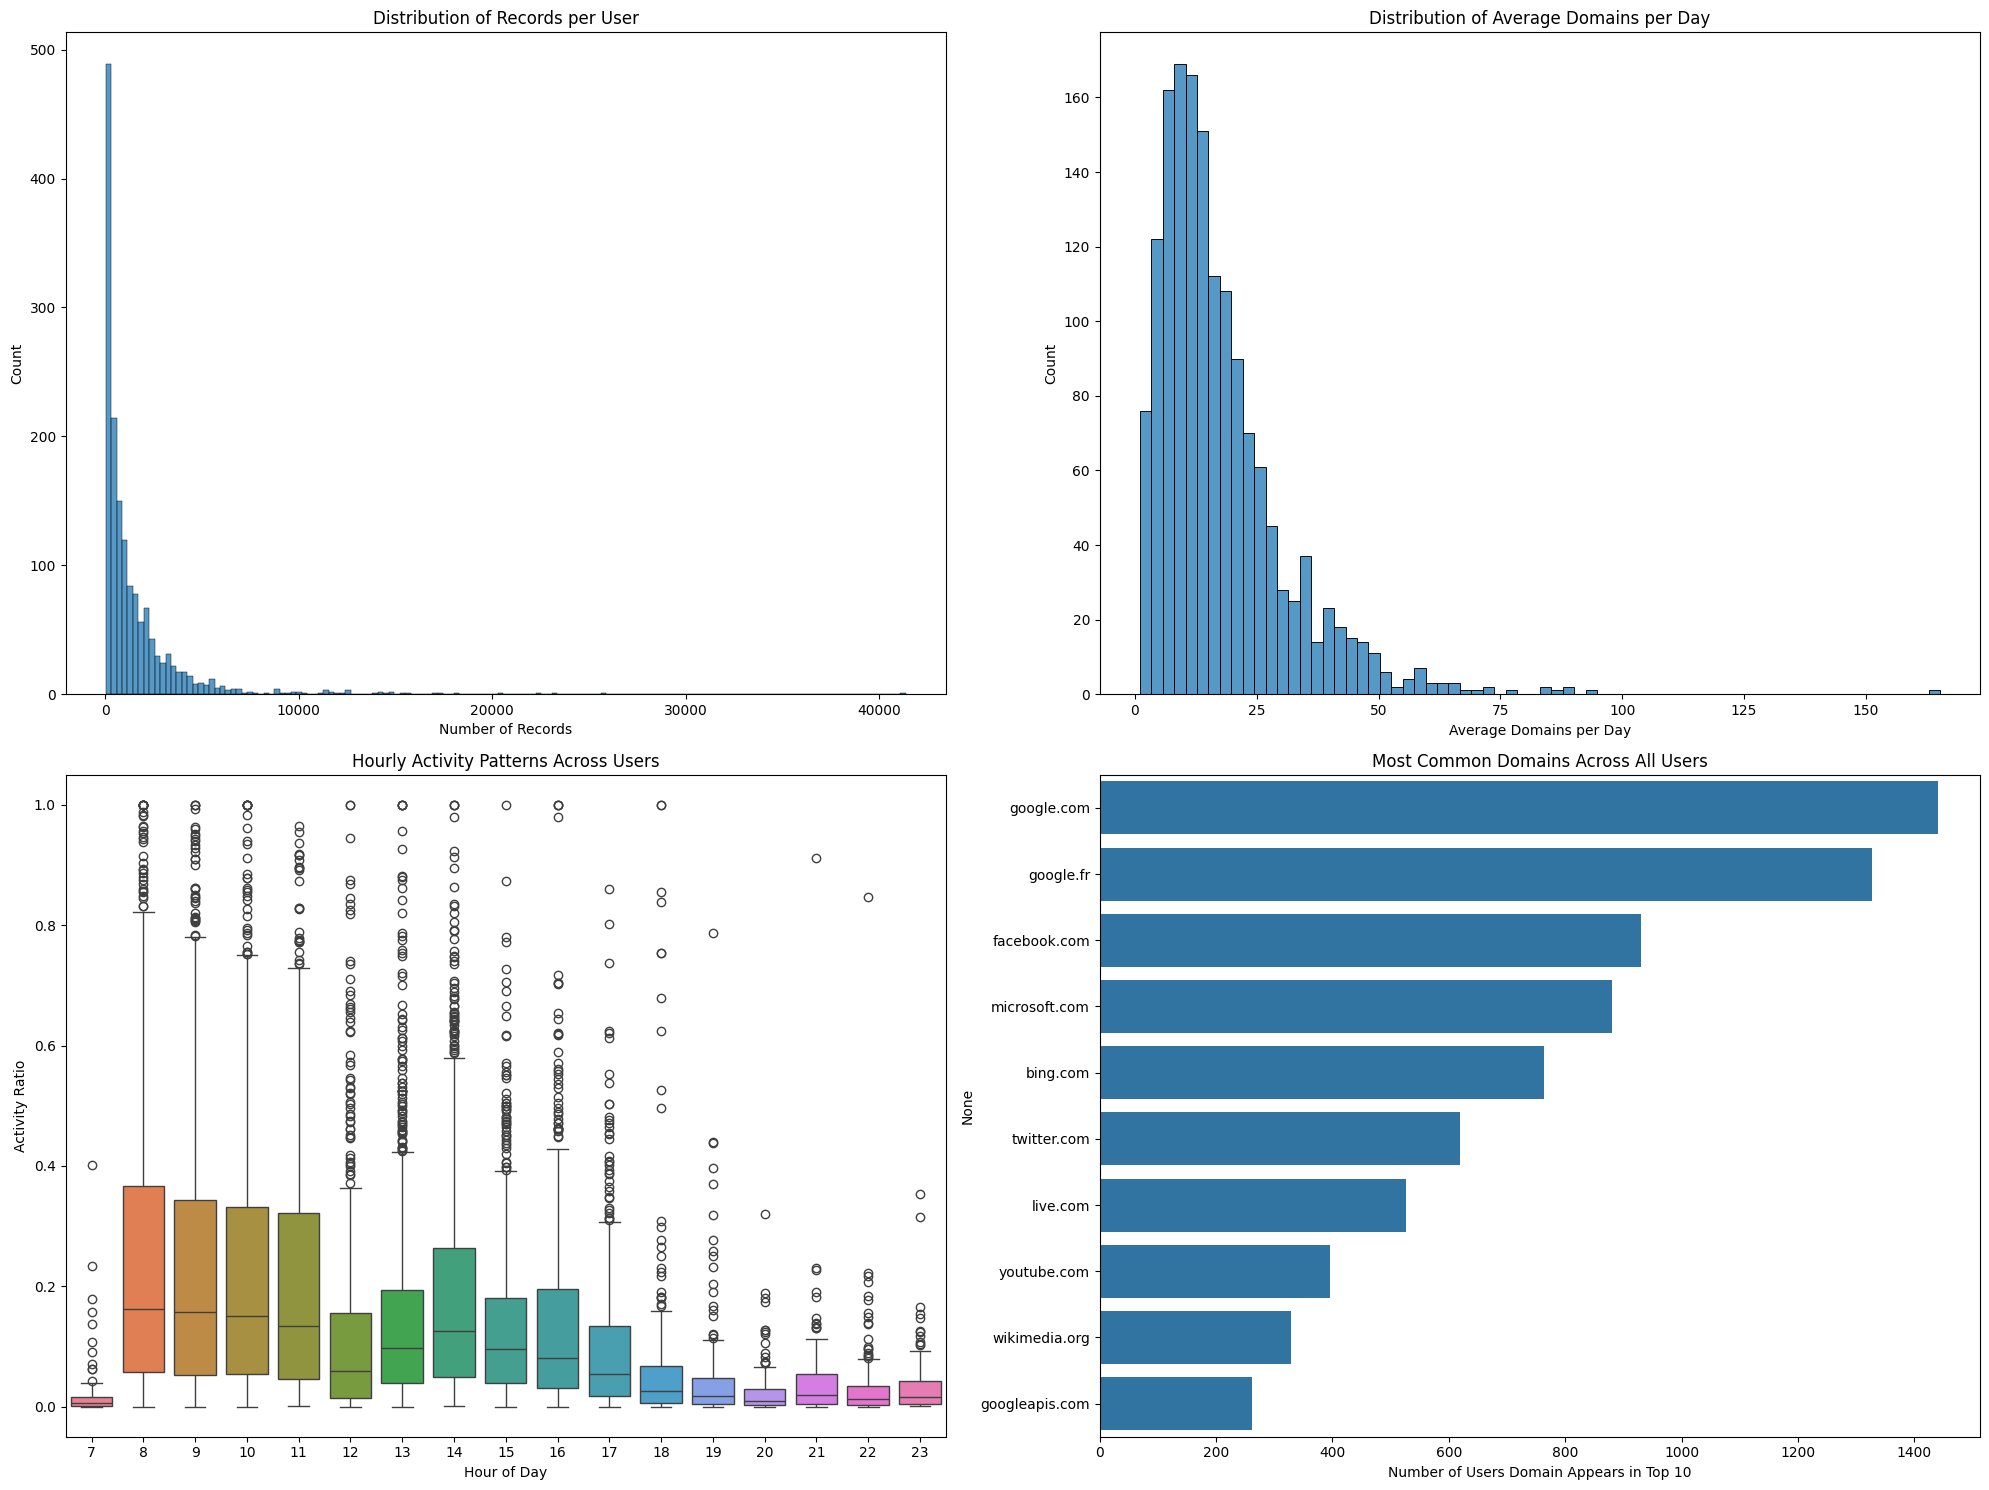

In [13]:
top_domain_stats = dataset.compute_top_domains()
hourly_patterns, _ = dataset.analyse_temporal_patterns_across_users(dataset.user_data)

plot_distributions(user_stats, hourly_patterns, top_domain_stats)
plt.show()